# Занятие 11. Проект построения модели машинного обучения для регрессии

Веберите любые данные для задачи регрессии из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и постройте модель машинного обучения в соответствии с приведенной ниже схемой. Комментарии к каждому разделу обязательны.

*Выполнил:* Бронников Егор ПМ-1901

*Последнее изменение:* 27/12/2021

### 1. Problem Definition, Loading the libraries and the dataset

In [33]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

### Данные

*Источник:* http://archive.ics.uci.edu/ml/datasets/Wine+Quality

*Название:* **Wine Quality Data Set**

#### Описание данных

Включены два набора данных, относящиеся к образцам красного и белого вин с севера Португалии. Но в данной работе будут рассматриваться только данные по белому вину.

### Описание полей

1. **fixed acidity** — фиксированная кислотность;
1. **volatile acidity** — летучая кислотность;
1. **citric acid** — лимонная кислота;
1. **residual sugar** — остаточный сахар;
1. **chlorides** — хлориды;
1. **free sulfur dioxide** — свободный диоксид серы;
1. **total sulfur dioxide** — общий диоксид серы;
1. **density** — густота;
1. **pH** — потенциал водорода;
1. **sulphates** — сульфаты ;
1. **alcohol** — спирт;
1. **quality** — качество (от 0 до 10);

In [8]:
filename = "winequality-white.csv"
dataframe = read_csv(filename, delimiter=";")
array = dataframe.values
dataframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 2. Analyze Data

#### Descriptive statistics

In [10]:
print(dataframe.shape)

(4898, 12)


Таблица имеет выборку из 4898 элементов, каждый из которых состоит из 12 атрибутов.

In [12]:
# types
print(dataframe.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Выводим типы переменных по столбцам.

In [14]:
# head
print(dataframe.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

Выводим таблицу с нашими данными для того, чтобы еще раз взглянуть на них.

In [19]:
# descriptions
print(dataframe.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

Выводим: частоту события, среднее значение, стандартное отклонение, наименьшее число в наборе данных, 25-й процентиль, 50-й процентиль, 75-й процентиль и максимальное число в наборе данных. (Процентиль - это квантиль с вероятностью выраженной в процентах)

In [21]:
# correlation
print(dataframe.corr(method='pearson'))

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

Выводим корреляционную матрицу, чтобы взглянуть на наличие или отсутствие зависимости между элементами.

#### Data Visualizations

##### Unimodal Data Visualizations

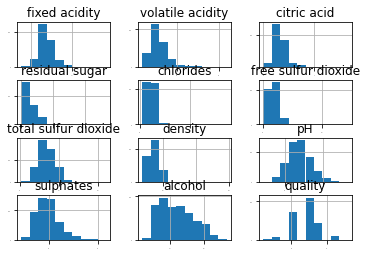

In [26]:
# histograms
dataframe.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

Строим гистограмму для каждого столбца данных. Гистограммы были построены для 12 столбцов.

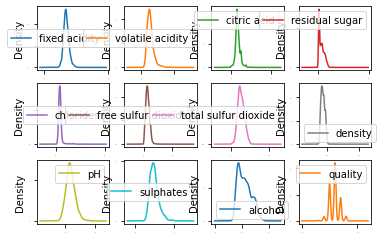

In [28]:
# density
dataframe.plot(kind='density', subplots=True, layout=(3,4), sharex=False, fontsize=1)
pyplot.show()

По нашим данным строим графики плотности. На данных графиках тоже можно увидеть влияние асимметрии на них. Напимер, данные столбца `density` имеют положительную асимметрию,что заметно на графике плотностей.

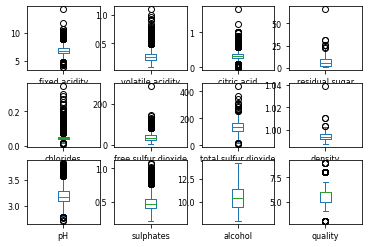

In [30]:
# box and whisker plots
dataframe.plot(kind='box', subplots=True, layout=(3,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()

На ящике с усами можно увидеть асимметрию распределений. Напимер, данные столбца `density` имеют положительную асимметрию, мы видим много точек, находящихся выше ящика, эти точки - значения, которые находятся очень далеко от статистически значимой части данных, а так же линия внутри ящика расположена ниже его середины, а это и говорит нам о положительной ассиметрии.

##### Multimodal Data Visualizations

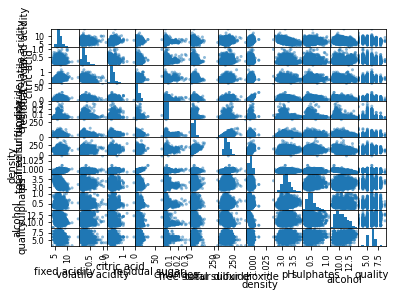

In [34]:
# scatter plot matrix
scatter_matrix(dataframe)
pyplot.show()

Создаем  матрицу точечной диаграммы. Каждая точечная диаграмма в матрице визуализирует корреляцию между парой переменных. Отображаемые на диаграммах рассеяния паттерны позволяют увидеть разные типы корреляции. Среди них: положительная (оба значения увеличиваются), отрицательная (одно значение увеличивается, в то время как второе уменьшается), нулевая (отсутствие корреляции), линейная, экспоненциальная и подковообразная. Сила корреляции определяется по тому, насколько близко расположены друг от друга точки на графике.

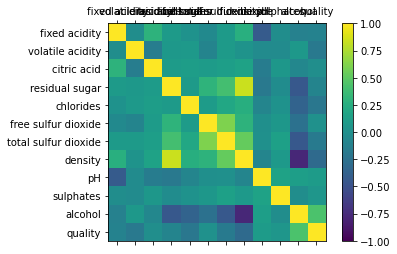

In [42]:
# correlation matrix
names=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

По корреляционной матрице, найденной нами ранее, строим тепловую карту, где цвета от фиолетового до желтого распределяются в соответствии со  значениями в корреляционной матрице от -1 до 1. Таким образом, из данной матрицы видно, что у нас есть корреляция между параметрами: `alcohol` и `total sulfur dioxide`, а также `total sulfur dioxide` и `free sulfur dioxide`.

### 3. Validation Dataset

In [44]:
array = dataframe.values
X = array[:,0:11]
Y = array[:,11]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

Создаем тестовую и проверяющую выборки.

### 4. Evaluate Algorithms: Baseline

In [45]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [46]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.567042 (0.042633)
LASSO: -0.746601 (0.048209)
EN: -0.739742 (0.046590)
KNN: -0.672174 (0.052879)
CART: -0.762906 (0.061875)
SVR: -0.662427 (0.046535)


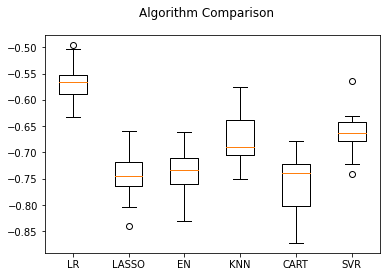

In [47]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Мы сравнивали между собой алгоритмы _линейной регрессии_, _лассо регресии_, _эластичной чистой регрессии_, _алгоритм k-ближайших соседей_, _алгоритм деревьев классификации_ и _алгоритм опорных векторов_ (_Support Vector Machine_). Исходя из результатов, полученных на основе средней квадратичной ошибки можно сделать о том, что самые точные значения выводят модели, сформированные алгоритмами: `LR`,`SVR` и `KNN`.

### 5. Evaluate Algorithms: Standardize Data

In [48]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.567042 (0.042633)
ScaledLASSO: -0.779974 (0.044666)
ScaledEN: -0.779974 (0.044666)
ScaledKNN: -0.511123 (0.045990)
ScaledCART: -0.773109 (0.061306)
ScaledSVR: -0.480313 (0.038095)


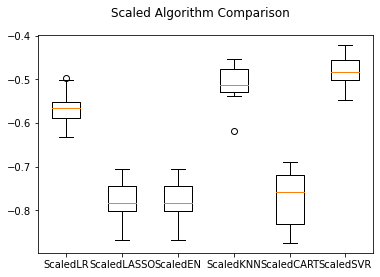

In [49]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Мы сравнивали между собой алгоритмы _линейной регрессии_, _лассо регресии_, _эластичной чистой регрессии_, _алгоритм k-ближайших соседей_, _алгоритм деревьев классификации_ и _алгоритм опорных векторов_ (_Support Vector Machine_) для стандартизированных данных. Исходя из результатов, полученных на основе средней квадратичной ошибки можно сделать о том, что самые точные значения выводят модели, сформированные алгоритмами: `ScaledSVR`, `ScaledKNN` и `ScaledLR`.

### 6. Algorithm Tuning

In [50]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.501675 using {'n_neighbors': 9}
-0.630415 (0.039923) with: {'n_neighbors': 1}
-0.524110 (0.036428) with: {'n_neighbors': 3}
-0.510766 (0.046606) with: {'n_neighbors': 5}
-0.502370 (0.045157) with: {'n_neighbors': 7}
-0.501675 (0.040500) with: {'n_neighbors': 9}
-0.502193 (0.042800) with: {'n_neighbors': 11}
-0.504298 (0.045515) with: {'n_neighbors': 13}
-0.508387 (0.046105) with: {'n_neighbors': 15}
-0.513744 (0.047480) with: {'n_neighbors': 17}
-0.515529 (0.047205) with: {'n_neighbors': 19}
-0.516056 (0.047049) with: {'n_neighbors': 21}


Приведенный алгоритм оценивает различные значения k для алгоритма регрессии `KNeighborsRegressor` в стандартном наборе данных. Лучшее значение получается при __k=9__.

### 7. Ensemble Methods

In [51]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -0.550933 (0.053847)
ScaledGBM: -0.472760 (0.040968)
ScaledRF: -0.422490 (0.026700)
ScaledET: -0.406041 (0.030073)


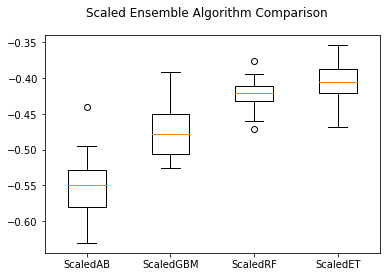

In [52]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Мы сравнивали между собой ансамблевые методы для стандартизированных данных (AdaBoost, Gradient Boosting Machines, Random Forest и Extra Trees). Исходя из результатов, полученных на основе средней квадратичной ошибки можно сделать о том, что самые точные значения выводят модели, сформированные алгоритмами: `ScaledET`, `ScaledRF` и `ScaledGBM`.

In [54]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [55]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.453713 using {'n_estimators': 400}
-0.489058 (0.040835) with: {'n_estimators': 50}
-0.472887 (0.041369) with: {'n_estimators': 100}
-0.466293 (0.041002) with: {'n_estimators': 150}
-0.461270 (0.039639) with: {'n_estimators': 200}
-0.459200 (0.039506) with: {'n_estimators': 250}
-0.457596 (0.040585) with: {'n_estimators': 300}
-0.455413 (0.039951) with: {'n_estimators': 350}
-0.453713 (0.039069) with: {'n_estimators': 400}


Приведенный алгоритм оценивает различные значения _param_ для алгоритма регрессии `GradientBoostingRegressor` в стандартном наборе данных. Лучшее значение получается при __param=400__.

### 8. Finalize Model

In [56]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

Задаем `GradientBoostingRegressor` лучшее значение n_estimators полученное ранее.

In [57]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

0.44948307406662813


Преобразуем набор данных и выведем значение средней квадратичной ошибки модели, который равен __0.4494__, это значение очень близко к 1, а это значит, что модель очень хорошо объясняет данные.